Interesting recent GPU benchmarks (2022) which show the 1080Ti at about 1/5 the speed of the latest tech:

https://lambdalabs.com/gpu-benchmarks

In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

In [2]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

torch.backends.cudnn.benchmark = True

In [3]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

True

Switching to CPU to see how things go...
Hmmm, these settings were supposed to work, but the GPU was still being used.
Switching to the default Python kernel which should not have GPU suppport.

In [4]:
torch.device("cpu")
default_device(-1)
defaults.device = 'cpu'
# torch.cuda.device(0) to select the first GPU (and only GPU on my system)
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1080 Ti'

In [6]:
path = untar_data(URLs.CIFAR)
path

Path('C:/Users/ron-w/.fastai/data/cifar10')

In [7]:
bs = 256

In [8]:
ds_tfms = ([OldRandomCrop(4, 32), FlipItem(p=0.5)], [])
data = ImageDataLoaders.from_folder(path, valid='test', item_tfms=ds_tfms, bs=bs)

In [9]:
learn = Learner(data, xresnet152(pretrained=True).to("cpu"), metrics=accuracy)

**Fit One Cycle**
Good info on fit_one_cycle: https://iconof.com/1cycle-learning-rate-policy/
https://sgugger.github.io/the-1cycle-policy.html
https://fastai.github.io/fastbook2e/accel_sgd.html

Changed the model to xresnet152, and using pretrained=True, 15 epochs, adding momentum

In [14]:
??learn.to

Signature: learn.to(*args, **kwargs)
Source:   
    def to(self, *args, **kwargs):
        r"""Moves and/or casts the parameters and buffers.

        This can be called as

        .. function:: to(device=None, dtype=None, non_blocking=False)
           :noindex:

        .. function:: to(dtype, non_blocking=False)
           :noindex:

        .. function:: to(tensor, non_blocking=False)
           :noindex:

        .. function:: to(memory_format=torch.channels_last)
           :noindex:

        Its signature is similar to :meth:`torch.Tensor.to`, but only accepts
        floating point or complex :attr:`dtype`\ s. In addition, this method will
        only cast the floating point or complex parameters and buffers to :attr:`dtype`
        (if given). The integral parameters and buffers will be moved
        :attr:`device`, if that is given, but with dtypes unchanged. When
        :attr:`non_blocking` is set, it tries to convert/move asynchronously
        with respect to the host i

SuggestedLRs(valley=0.0008317637839354575)

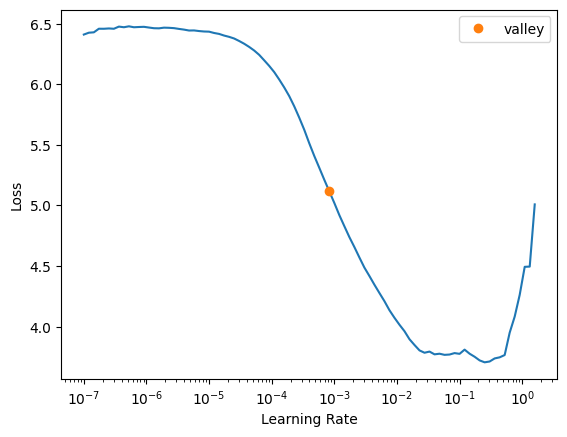

In [16]:
cpu = torch.device("cpu")
learn.to(cpu)
learn.lr_find()

In [37]:
learn.fit_one_cycle(15, 0.000575439, wd=0.4, div=10, pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 